In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [19]:
heromotoco = pd.read_csv('HEROMOTOCO.csv')
heromotoco.head()

Date     Symbol Series  Prev Close    Open     High      Low  \
0  2000-01-03  HEROHONDA     EQ     1145.20  1200.0  1236.80  1171.00   
1  2000-01-04  HEROHONDA     EQ     1207.60  1200.0  1220.00  1176.00   
2  2000-01-05  HEROHONDA     EQ     1199.85  1155.0  1178.00  1140.00   
3  2000-01-06  HEROHONDA     EQ     1143.80  1183.0  1189.95  1150.25   
4  2000-01-07  HEROHONDA     EQ     1161.40  1140.0  1140.00  1069.00   

      Last    Close     VWAP  Volume      Turnover  Trades  \
0  1209.95  1207.60  1209.11   10631  1.285401e+12     NaN   
1  1200.00  1199.85  1200.93   19849  2.383719e+12     NaN   
2  1140.00  1143.80  1159.74    2525  2.928355e+11     NaN   
3  1165.00  1161.40  1167.29    4375  5.106887e+11     NaN   
4  1105.00  1106.55  1103.52    9093  1.003429e+12     NaN   

   Deliverable Volume  %Deliverble  
0                 NaN          NaN  
1                 NaN          NaN  
2                 NaN          NaN  
3                 NaN          NaN  
4                 NaN          NaN

In [20]:
heromotoco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [21]:
heromotoco['Date'] = pd.to_datetime(heromotoco['Date'])

In [22]:
print(f'Dataframe contains stock prices between {heromotoco.Date.min()} and {heromotoco.Date.max()}') 
print(f'Total days = {(heromotoco.Date.max()  - heromotoco.Date.min()).days} days')

Dataframe contains stock prices between 2000-01-03 00:00:00 2021-04-30 00:00:00
Total days = 7788 days


In [23]:
heromotoco.describe()

Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1651.346862  1653.169544  1675.767273  1628.693781  1651.483047   
std    1083.346794  1085.385796  1095.027199  1073.447115  1083.179725   
min     116.650000   117.000000   123.700000   115.050000   117.000000   
25%     697.287500   697.325000   709.900000   682.000000   697.000000   
50%    1689.425000  1690.000000  1713.500000  1660.750000  1689.550000   
75%    2584.487500  2590.000000  2617.775000  2555.750000  2585.000000   
max    4048.950000  4084.000000  4091.950000  3995.000000  4036.050000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean   1651.662345  1652.497631  4.871809e+05  9.100201e+13   37295.248779   
std    1083.443103  1084.177213  5.300477e+05  1.396886e+14   26960.953831   
min     116.650000   118.880000  5.960000e+02  2.765216e+10     646.000000   
25%     697.287500   696.077500  2.078688e+05  1.588965e+13   20107.500000   
50%    1689.925000  1686.615000  3.546025e+05  5.149785e+13   29540.000000   
75%    2584.725000  2588.282500  5.967798e+05  1.114694e+14   45236.500000   
max    4048.950000  4046.970000  1.166595e+07  3.359303e+15  243105.000000   

       Deliverable Volume  %Deliverble  
count        4.797000e+03  4797.000000  
mean         2.599261e+05     0.519843  
std          2.785190e+05     0.155270  
min          1.642000e+03     0.083700  
25%          1.227350e+05     0.413600  
50%          2.018250e+05     0.526400  
75%          3.266780e+05     0.632700  
max          8.862088e+06     1.000000

<AxesSubplot:>

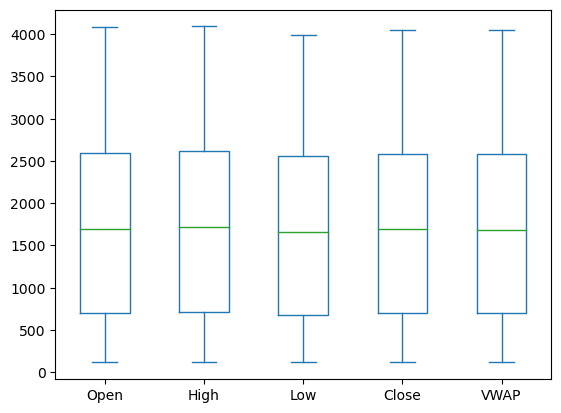

In [24]:
heromotoco[['Open','High','Low','Close','VWAP']].plot(kind='box')

In [25]:
#setting layout for plot
layout = go.Layout(
    title='Stock Prices of HEROMOTOCO',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

heromotoco_data = [{'x':heromotoco['Date'], 'y':heromotoco['Close']}]
plot = go.Figure(data=heromotoco_data, layout=layout)

In [26]:
#plotting offline
iplot(plot)

In [27]:
# Building regression model
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [28]:
#Spliting the data into train and test sets
X = np.array(heromotoco.index).reshape(-1,1)
Y = heromotoco['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [29]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [32]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
heromotoco_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=heromotoco_data, layout=layout)

In [33]:
iplot(plot2)

In [35]:
import plotly
plotly.offline.plot(plot2,filename='output.html',config={'displayModeBar': False})

'output.html'

In [36]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8246772876773119	0.8177030866648783
MSE       207474.37029707094	209775.29679981153



In [37]:
heromotoco.tail()

Date      Symbol Series  Prev Close     Open    High      Low  \
5301 2021-04-26  HEROMOTOCO     EQ     2864.05  2860.05  2878.4  2830.00   
5302 2021-04-27  HEROMOTOCO     EQ     2864.55  2875.00  2939.0  2870.25   
5303 2021-04-28  HEROMOTOCO     EQ     2905.50  2928.00  3009.0  2915.05   
5304 2021-04-29  HEROMOTOCO     EQ     2926.25  2963.80  2963.8  2850.05   
5305 2021-04-30  HEROMOTOCO     EQ     2860.10  2834.80  2860.0  2805.00   

         Last    Close     VWAP   Volume      Turnover   Trades  \
5301  2865.05  2864.55  2855.14   831133  2.373003e+14  46378.0   
5302  2912.00  2905.50  2912.01   811184  2.362178e+14  57761.0   
5303  2932.00  2926.25  2964.25  1389833  4.119816e+14  67349.0   
5304  2857.00  2860.10  2886.24  1009327  2.913165e+14  60682.0   
5305  2818.00  2819.15  2833.08   670258  1.898897e+14  50970.0   

      Deliverable Volume  %Deliverble  
5301            406724.0       0.4894  
5302            222680.0       0.2745  
5303            246401.0       0.1773  
5304            318216.0       0.3153  
5305            302022.0       0.4506